# Creating an NLP Neural Network to Predict Price of Wine

## Flatiron School - Cohort 100719PT
## Instructor - James Irving
## By Acusio Bivona

### Questions for/with James
 - WHAT THE FUCK IS A SINGLETON ARRAY

In [1]:
import pandas as pd
df = pd.read_csv("winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [5]:
def fill_cols_na(df, column):
    
    """This function can be used to fill in columns with a literal 'N/A', if it is necessary
    
    Parameters:
    
    df - dataframe to pull columns from
    
    column - can be a single column or list of columns"""
        
    df2 = df.copy()
    
    df2[column] = df2[column].fillna('N/A')
    
    return df2

In [6]:
df = fill_cols_na(df, ['country', 'designation', 'province', 'region_1', 'region_2', 'taster_name',
                      'taster_twitter_handle', 'variety'])

In [7]:
pd.set_option('display.max_rows', 500)

In [8]:
df['price'].value_counts()

20.0      6940
15.0      6066
25.0      5805
30.0      4951
18.0      4883
12.0      3934
40.0      3872
35.0      3801
13.0      3549
16.0      3547
10.0      3439
22.0      3357
50.0      3334
14.0      3215
45.0      3135
17.0      3053
28.0      2942
24.0      2826
19.0      2816
60.0      2277
11.0      2058
55.0      1981
32.0      1963
38.0      1728
23.0      1715
26.0      1706
65.0      1614
75.0      1403
42.0      1403
36.0      1392
29.0      1387
9.0       1339
48.0      1309
21.0      1232
27.0      1193
70.0      1100
34.0      1069
39.0       924
8.0        892
80.0       881
33.0       668
90.0       665
85.0       655
44.0       586
100.0      585
49.0       585
37.0       527
52.0       517
7.0        433
46.0       430
58.0       413
95.0       397
54.0       384
125.0      328
43.0       311
56.0       291
31.0       276
59.0       263
120.0      262
62.0       253
150.0      239
47.0       239
68.0       222
110.0      200
69.0       195
41.0       194
53.0      

In [9]:
df['price'].describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [10]:
df['price'].median()

25.0

In [11]:
df['price'].mode()

0    20.0
dtype: float64

In [12]:
df['price'].fillna(df['price'].median(), inplace=True)

In [13]:
df.isna().sum()

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

In [14]:
df['price'].hist(bins='auto')

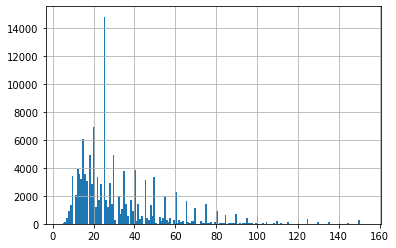

In [15]:
import numpy as np
from scipy.stats import zscore
good_rows = np.abs(zscore(df['price'].values))<=3
df[good_rows]['price'].hist(bins='auto')
df=df[good_rows]

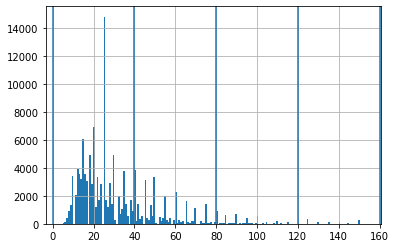

In [16]:
cut_labels = [0, 1, 2, 3]
cut_bins = [0,40,80,120,160]
ax = df['price'].hist(bins='auto')
[ax.axvline(val) for val in cut_bins]
df['Price Category'] = pd.cut(df['price'], bins=cut_bins, labels=cut_labels)

In [17]:
df['Price Category'].value_counts(normalize=True)

0    0.766383
1    0.193710
2    0.030820
3    0.009087
Name: Price Category, dtype: float64

In [18]:
df.isna().sum()

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
Price Category           0
dtype: int64

# Text Preprocessing

In [19]:
import numpy as np
np.random.seed(0)
from gensim.models import Word2Vec
from nltk import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
import string

In [20]:
corpus = df['description']
corpus[:10]

0    Aromas include tropical fruit, broom, brimston...
1    This is ripe and fruity, a wine that is smooth...
2    Tart and snappy, the flavors of lime flesh and...
3    Pineapple rind, lemon pith and orange blossom ...
4    Much like the regular bottling from 2012, this...
5    Blackberry and raspberry aromas show a typical...
6    Here's a bright, informal red that opens with ...
7    This dry and restrained wine offers spice in p...
8    Savory dried thyme notes accent sunnier flavor...
9    This has great depth of flavor with its fresh ...
Name: description, dtype: object

In [21]:
','.join(corpus)[:100]

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, "

In [22]:
freq = FreqDist(','.join(corpus))
freq.most_common(100)

[(' ', 5057673),
 ('e', 2646377),
 ('a', 2172393),
 ('t', 2011884),
 ('i', 1972193),
 ('n', 1780800),
 ('r', 1741191),
 ('s', 1635001),
 ('o', 1534916),
 ('l', 1173055),
 ('h', 1137613),
 ('d', 1000737),
 ('c', 763747),
 ('f', 700384),
 ('u', 635160),
 (',', 563993),
 ('y', 561736),
 ('p', 546591),
 ('m', 469445),
 ('g', 456009),
 ('b', 437419),
 ('w', 436031),
 ('.', 351920),
 ('v', 258032),
 ('k', 221797),
 ('T', 114471),
 ('-', 75738),
 ("'", 58035),
 ('x', 55576),
 ('I', 51694),
 ('0', 47702),
 ('A', 44238),
 ('S', 42445),
 ('2', 41814),
 ('C', 40157),
 ('j', 32076),
 ('D', 31312),
 ('1', 27614),
 ('M', 26333),
 ('B', 24521),
 ('P', 23005),
 ('F', 22965),
 ('z', 19852),
 ('%', 19017),
 ('R', 17555),
 ('q', 15807),
 ('G', 13439),
 ('W', 12517),
 ('V', 12291),
 ('N', 11318),
 ('L', 10952),
 ('5', 10064),
 ('H', 8203),
 ('8', 8014),
 ('O', 7753),
 ('3', 6910),
 ('7', 6386),
 ('E', 6353),
 ('9', 6256),
 ('–', 6142),
 ('6', 5969),
 ('é', 5836),
 ('4', 5512),
 ('—', 4311),
 (')', 4283),


In [23]:
tokens = word_tokenize(','.join(corpus))
tokens[:10]

['Aromas',
 'include',
 'tropical',
 'fruit',
 ',',
 'broom',
 ',',
 'brimstone',
 'and',
 'dried']

In [24]:
len(tokens)

6061563

In [25]:
freq = FreqDist(tokens)
freq.most_common(100)

[(',', 562769),
 ('and', 343503),
 ('.', 221767),
 ('of', 170907),
 ('the', 166105),
 ('a', 155975),
 ('with', 114656),
 ('is', 95971),
 ('wine', 76835),
 ('this', 71932),
 ('in', 59354),
 ('flavors', 57106),
 ('to', 54617),
 ('The', 52018),
 ("'s", 50731),
 ('fruit', 43171),
 ('It', 42989),
 ('on', 42685),
 ('it', 41389),
 ('This', 40696),
 ('that', 38806),
 ('palate', 37090),
 ('aromas', 35099),
 ('acidity', 30981),
 ('from', 29438),
 ('but', 29066),
 ('tannins', 27217),
 ('cherry', 26601),
 ('are', 25650),
 ('ripe', 24537),
 ('has', 24322),
 ('black', 23986),
 ('finish', 21876),
 ('A', 21645),
 ('for', 20441),
 ('by', 20387),
 ('Drink', 20008),
 ('%', 19017),
 ('notes', 17791),
 ('red', 17665),
 ('spice', 17638),
 ('as', 17046),
 ('nose', 16788),
 ('its', 16027),
 ('rich', 15693),
 ('an', 15570),
 ('oak', 15230),
 ('berry', 15089),
 ('fresh', 15060),
 ('dry', 13635),
 ('plum', 13588),
 ('fruits', 13038),
 ('blend', 12871),
 ('finish.', 12784),
 ('offers', 12474),
 ('apple', 12353),


In [26]:
stopwords_list = stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
additional_punc = ['“','”','...','``',"''",'’',"'s"]

In [28]:
stopwords_list+=string.punctuation
stopwords_list.extend(additional_punc)
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
stopped_tokens = [word.lower() for word in tokens if word.lower() not in stopwords_list]
stopped_tokens

['aromas',
 'include',
 'tropical',
 'fruit',
 'broom',
 'brimstone',
 'dried',
 'herb',
 'palate',
 "n't",
 'overly',
 'expressive',
 'offering',
 'unripened',
 'apple',
 'citrus',
 'dried',
 'sage',
 'alongside',
 'brisk',
 'acidity.',
 'ripe',
 'fruity',
 'wine',
 'smooth',
 'still',
 'structured',
 'firm',
 'tannins',
 'filled',
 'juicy',
 'red',
 'berry',
 'fruits',
 'freshened',
 'acidity',
 'already',
 'drinkable',
 'although',
 'certainly',
 'better',
 '2016.',
 'tart',
 'snappy',
 'flavors',
 'lime',
 'flesh',
 'rind',
 'dominate',
 'green',
 'pineapple',
 'pokes',
 'crisp',
 'acidity',
 'underscoring',
 'flavors',
 'wine',
 'stainless-steel',
 'fermented.',
 'pineapple',
 'rind',
 'lemon',
 'pith',
 'orange',
 'blossom',
 'start',
 'aromas',
 'palate',
 'bit',
 'opulent',
 'notes',
 'honey-drizzled',
 'guava',
 'mango',
 'giving',
 'way',
 'slightly',
 'astringent',
 'semidry',
 'finish.',
 'much',
 'like',
 'regular',
 'bottling',
 '2012',
 'comes',
 'across',
 'rather',
 'r

In [30]:
len(stopped_tokens)

3213762

In [31]:
freq = FreqDist(stopped_tokens)
freq.most_common(100)

[('wine', 77008),
 ('flavors', 59555),
 ('fruit', 43391),
 ('aromas', 39242),
 ('palate', 37094),
 ('acidity', 31404),
 ('tannins', 27567),
 ('drink', 27364),
 ('cherry', 26978),
 ('ripe', 26578),
 ('black', 24934),
 ('finish', 21879),
 ('red', 18555),
 ('notes', 18256),
 ('spice', 17922),
 ('rich', 16896),
 ('nose', 16801),
 ('fresh', 16593),
 ('oak', 15655),
 ('berry', 15282),
 ('dry', 15010),
 ('plum', 13935),
 ('soft', 13290),
 ('fruits', 13040),
 ('blend', 12888),
 ('finish.', 12784),
 ('apple', 12672),
 ('offers', 12578),
 ('crisp', 12577),
 ('blackberry', 12455),
 ('white', 12177),
 ('sweet', 12036),
 ('texture', 11405),
 ('shows', 11383),
 ('light', 11267),
 ('citrus', 11193),
 ('dark', 11094),
 ('bright', 10793),
 ('vanilla', 10361),
 ('cabernet', 10250),
 ('well', 10094),
 ('full', 9959),
 ('juicy', 9599),
 ('pepper', 9496),
 ('fruity', 9329),
 ('good', 9312),
 ('raspberry', 9180),
 ('firm', 8952),
 ('green', 8932),
 ('peach', 8403),
 ('touch', 8396),
 ('lemon', 8381),
 ('cho

# Neural Network

In [32]:
target = df['Price Category']

In [57]:
total_vocabulary = np.array((stopped_tokens))

In [58]:
len(total_vocabulary)
print('There are {} unique tokens in the dataset.'.format(len(total_vocabulary)))

There are 3213762 unique tokens in the dataset.


In [35]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qi

In [59]:
y = to_categorical(target).copy()
X = total_vocabulary.copy()

In [60]:
np.shape(X)

(3213762,)

In [61]:
np.shape(y)

(128749, 4)

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

ValueError: Found input variables with inconsistent numbers of samples: [3213762, 128749]

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_tr = sequence.pad_sequences(X_train_seq, maxlen=100)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_te = sequence.pad_sequences(X_test_seq, maxlen=100)

In [ ]:
embedding_size = 128
model = Sequential()
model.add(Embedding(20000, embedding_size)) #input_length=100?
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

In [ ]:
model_2 = model.fit(X_tr, y_train, epochs=3, batch_size=128, validation_split=0.3)

In [ ]:
y_hat_test = model.predict(X_te)
#y_hat_test = model.predict_classes(X_te)
y_hat_test

In [ ]:
y_hat_test = y_hat_test.argmax(axis=1)#.shape)
y_hat_test

In [ ]:
def plot_confusion_matrix(conf_matrix, classes = None, normalize=True,
                          title='Confusion Matrix', cmap="Blues",
                          print_raw_matrix=False,
                          fig_size=(4,4)):
    """Check if Normalization Option is Set to True. 
    If so, normalize the raw confusion matrix before visualizing
    #Other code should be equivalent to your previous function.
    Note: Taken from bs_ds and modified
    - Can pass a tuple of (y_true,y_pred) instead of conf matrix.
    """
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    import sklearn.metrics as metrics
    
    ## make confusion matrix if given tuple of y_true,y_pred
    if isinstance(conf_matrix, tuple):
        y_true = conf_matrix[0].copy()
        y_pred = conf_matrix[1].copy()
        
        if y_true.ndim>1:
            y_true = y_true.argmax(axis=1)
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)
            
            
        cm = metrics.confusion_matrix(y_true,y_pred)
    else:
        cm = conf_matrix
        
    ## Generate integer labels for classes
    if classes is None:
        classes = list(range(len(cm)))  
        
    ## Normalize data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt='.2f'
    else:
        fmt= 'd'
        
        
    fontDict = {
        'title':{
            'fontsize':16,
            'fontweight':'semibold',
            'ha':'center',
            },
        'xlabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'ylabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'xtick_labels':{
            'fontsize':10,
            'fontweight':'normal',
    #             'rotation':45,
            'ha':'right',
            },
        'ytick_labels':{
            'fontsize':10,
            'fontweight':'normal',
            'rotation':0,
            'ha':'right',
            },
        'data_labels':{
            'ha':'center',
            'fontweight':'semibold',

        }
    }

    # Create plot
    fig,ax = plt.subplots(figsize=fig_size)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,**fontDict['title'])
    plt.colorbar()

    tick_marks = classes#np.arange(len(classes))

    plt.xticks(tick_marks, classes, **fontDict['xtick_labels'])
    plt.yticks(tick_marks, classes,**fontDict['ytick_labels'])

    # Determine threshold for b/w text
    thresh = cm.max() / 2.

    # fig,ax = plt.subplots()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color='darkgray',**fontDict['data_labels']) #color="white" if cm[i, j] > thresh else "black"

    plt.tight_layout()
    plt.ylabel('True label',**fontDict['ylabel'])
    plt.xlabel('Predicted label',**fontDict['xlabel'])

    if print_raw_matrix:
        print_title = 'Raw Confusion Matrix Counts:'
        print('\n',print_title)
        print(conf_matrix)


    fig = plt.gcf()
    return fig



def plot_keras_history(history,figsize_1=(6,4),
    figsize_2=(8,6)):
    """Plots keras history and returns fig"""
    
    ## Make a df from history
    if isinstance(history,dict)==False:
        history=history.history
    plot_df = pd.DataFrame(history)
    plot_df['Epoch'] = range(1,len(plot_df)+1)
    plot_df.set_index('Epoch',inplace=True)
    ## Get cols for acc vs loss
    acc_cols = list(filter(lambda x: 'acc' in x, plot_df.columns))
    loss_cols = list(filter(lambda x: 'loss' in x, plot_df.columns))   
    
    ## Set figsizes based on number of keys
    if len(acc_cols)>1:
        figsize=figsize_2
    else:
        figsize=figsize_1

    ## Make figure and axes
    fig,ax = plt.subplots(nrows=2,figsize=figsize,sharex=True)
    
    ## Plot Accuracy cols in plot 1
    plot_df[acc_cols].plot(ax=ax[0])
    ax[0].set(ylabel='Accuracy')
    ax[0].set_title('Training Results')

    ## Plot loss cols in plot 2
    plot_df[loss_cols].plot(ax=ax[1])
    ax[1].set(ylabel='Loss')
    ax[1].set_xlabel('Epoch #')


#     ## Change xaxis locators 
#     [a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(len(plot_df),integer=True)) for a in ax]
#     [a.set_xlim((1,len(plot_df)+1)) for a in ax]
    plt.tight_layout()
    
    return fig

In [ ]:
def evaluate_model(y_true, y_pred,history=None):
    """Evaluates neural network using sklearn metrics"""
    from sklearn import metrics
    if y_true.ndim>1:
        y_true = y_true.argmax(axis=1)
    if y_pred.ndim>1:
        y_pred = y_pred.argmax(axis=1)   
#     try:    
    if history is not None:
        plot_keras_history(history)
        plt.show()
#     except:
#         pass
    
    num_dashes=20
    print('\n')
    print('---'*num_dashes)
    print('\tCLASSIFICATION REPORT:')
    print('---'*num_dashes)
    try:
        print(metrics.classification_report(y_true,y_pred))
        
        fig = plot_confusion_matrix((y_true,y_pred))
        plt.show()
    except Exception as e:
        print(f"[!] Error during model evaluation:\n\t{e}")



In [ ]:
evaluate_model(y_test, y_hat_test, model_2)
#Big divergence is bad

In [ ]:
#Separate data according to class

In [ ]:
wordcloud = WordCloud(stopwords=None,collocations=False)
wordcloud.generate(','.join(stopped_tokens))
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off')

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
word_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)

words_scored = word_finder.score_ngrams(bigram_measures.raw_freq)
top_words = pd.DataFrame.from_records(words_scored,columns=['Words','Frequency']).head(20)
top_words

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

word_pmi_finder = nltk.BigramCollocationFinder.from_words(stopped_vocabulary)
word_pmi_finder.apply_freq_filter(5)

word_pmi_scored = word_pmi_finder.score_ngrams(bigram_measures.pmi)
pd.DataFrame.from_records(word_pmi_scored,columns=['Words','PMI']).head(20)